In [ ]:
import cv2  # For image processing
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    labels = []

    for label_folder in os.listdir(folder):
        # Skip hidden files and folders like .DS_Store
        if label_folder.startswith('.'):
            continue

        label_path = os.path.join(folder, label_folder)
        # Check if it's actually a directory
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    if label_folder == 'NORMAL':
                        labels.append(0)
                    else:
                        labels.append(1)

    return np.array(images), np.array(labels)

def flatten_images(images):
    n_samples = images.shape[0]
    return images.reshape((n_samples, -1))  # Flatten each image


In [ ]:
train = '/content/drive/MyDrive/CS464 project/chest_xray/train'
val =  '/content/drive/MyDrive/CS464 project/chest_xray/val'
test = '/content/drive/MyDrive/CS464 project/chest_xray/test'

train_X, train_Y =load_images_from_folder(train, img_size=(128, 128))
val_X, val_Y =load_images_from_folder(val, img_size=(128, 128))
test_X, test_Y =load_images_from_folder(test, img_size=(128, 128))

train_X = flatten_images(train_X)
val_X = flatten_images(val_X)
test_X = flatten_images(test_X)

K: 1 , F1 Score:0.7317073170731707
K: 2 , F1 Score:0.7573529411764706
K: 3 , F1 Score:0.740484429065744
K: 4 , F1 Score:0.75177304964539
K: 5 , F1 Score:0.7353951890034365
K: 6 , F1 Score:0.7482517482517482
K: 7 , F1 Score:0.7353951890034365
K: 8 , F1 Score:0.7482517482517482
K: 9 , F1 Score:0.7353951890034365
K: 10 , F1 Score:0.7508771929824561
K: 11 , F1 Score:0.7303754266211604
K: 12 , F1 Score:0.7379310344827587
K: 13 , F1 Score:0.7278911564625851
K: 14 , F1 Score:0.7328767123287672
K: 15 , F1 Score:0.7254237288135593
K: 16 , F1 Score:0.7353951890034365
K: 17 , F1 Score:0.722972972972973
K: 18 , F1 Score:0.7254237288135593
K: 19 , F1 Score:0.722972972972973
K: 20 , F1 Score:0.722972972972973
K: 21 , F1 Score:0.7205387205387206
K: 22 , F1 Score:0.7278911564625851
K: 23 , F1 Score:0.7254237288135593
K: 24 , F1 Score:0.7278911564625851
K: 25 , F1 Score:0.7181208053691275
K: 26 , F1 Score:0.7186440677966102
K: 27 , F1 Score:0.7205387205387206
K: 28 , F1 Score:0.7186440677966102
K: 29 ,

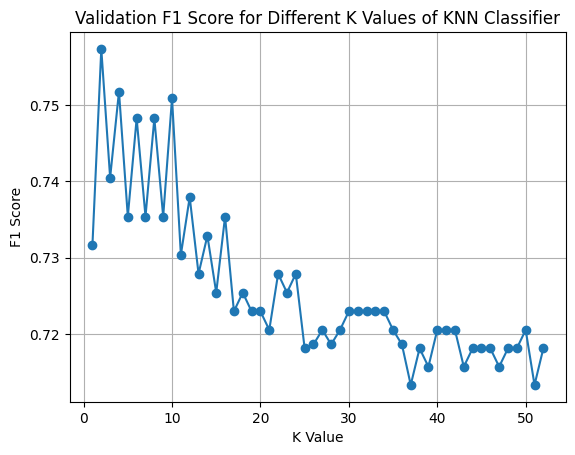

In [ ]:
#Validation Test Hyperparameter Tuning for KNN Classification

k_values = []
f1_scores = []
for k in range (1, 53, 1):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(train_X, train_Y)
  val_predictions = knn_classifier.predict(val_X)
  f1 = f1_score(val_Y, val_predictions)
  k_values.append(k)
  f1_scores.append(f1)
  print(f"K: {k} , F1 Score:{f1}")

plt.title("Validation F1 Score for Different K Values of KNN Classifier")
plt.plot(k_values, f1_scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

In [ ]:
# Now, use GridSearch to make hyperparameter tuning

from sklearn.model_selection import GridSearchCV

gridsearch_knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 53, 1)}
grid_search = GridSearchCV(gridsearch_knn, param_grid, cv=5)
grid_search.fit(train_X, train_Y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 6}
Best Cross-Validation Accuracy: 0.9381549975575435


In [ ]:
combined_train_val_X = np.concatenate((val_X, train_X), axis=0)
combined_train_val_Y = np.concatenate((val_Y, train_Y), axis=0)

knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(combined_train_val_X, combined_train_val_Y)
test_predictions = knn_classifier.predict(test_X)

accuracy_val = accuracy_score(test_Y, test_predictions)
f1_score_val = f1_score(test_Y, test_predictions)
print(f"Accuracy: {accuracy_val}")
print(f"F1 Score: {f1_score_val}")

Accuracy: 0.8136792452830188
F1 Score: 0.8797564687975646


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#WE CREATED TEST IMAGES FROM THE TEST DATA AND TRAIN IMAGES FROM TRAIN DATA TO AVIOD BIAS.

train_generator = datagen.flow_from_directory(
    train,
    target_size=(128, 128),
    batch_size=10000,
    class_mode='binary',
    color_mode='grayscale'
)

Found 5239 images belonging to 2 classes.


In [ ]:
Created_train_X, Created_train_Y = next(train_generator)
Created_train_X = flatten_images(Created_train_X)
combined_train_X = np.concatenate((Created_train_X, combined_train_val_X), axis=0)
combined_train_Y = np.concatenate((Created_train_Y, combined_train_val_Y), axis=0)

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=6)
final_knn.fit(combined_train_X, combined_train_Y)
test_predictions_final = final_knn.predict(test_X)
accuracy_final = accuracy_score(test_Y, test_predictions_final)
f1_score_final = f1_score(test_Y, test_predictions_final)
print(f"Accuracy: {accuracy_final}")
print(f"F1 Score: {f1_score_final}")

Accuracy: 0.8136792452830188
F1 Score: 0.8797564687975646


              precision    recall  f1-score   support

           0       0.98      0.42      0.59       134
           1       0.79      1.00      0.88       290

    accuracy                           0.81       424
   macro avg       0.88      0.71      0.73       424
weighted avg       0.85      0.81      0.79       424



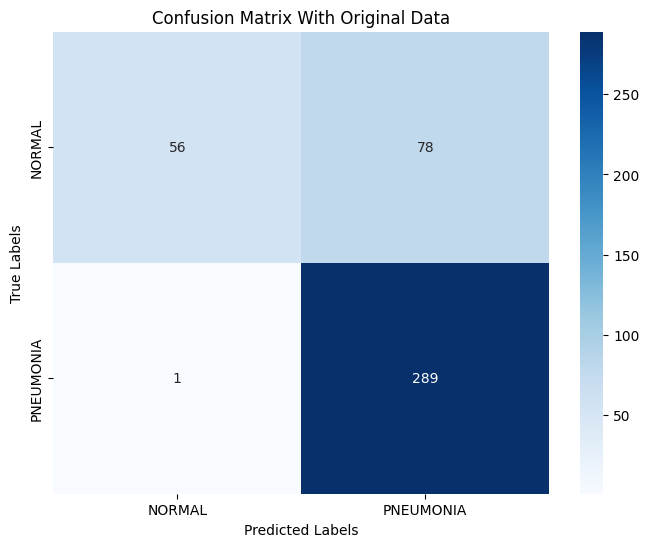

              precision    recall  f1-score   support

           0       0.98      0.42      0.59       134
           1       0.79      1.00      0.88       290

    accuracy                           0.81       424
   macro avg       0.88      0.71      0.73       424
weighted avg       0.85      0.81      0.79       424



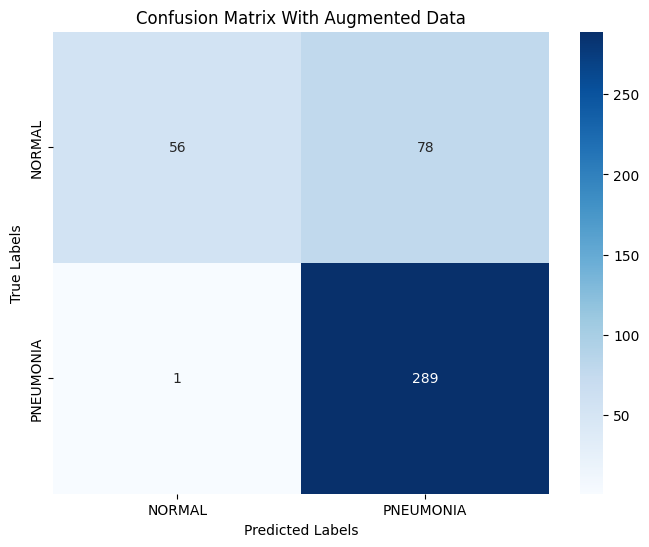

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

print(classification_report(test_Y, test_predictions))

cm = confusion_matrix(test_Y, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix With Original Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


print(classification_report(test_Y, test_predictions_final))

cm = confusion_matrix(test_Y, test_predictions_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix With Augmented Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Classification Report With Original Data:
              precision    recall  f1-score   support

           0       0.98      0.42      0.59       134
           1       0.79      1.00      0.88       290

    accuracy                           0.81       424
   macro avg       0.88      0.71      0.73       424
weighted avg       0.85      0.81      0.79       424



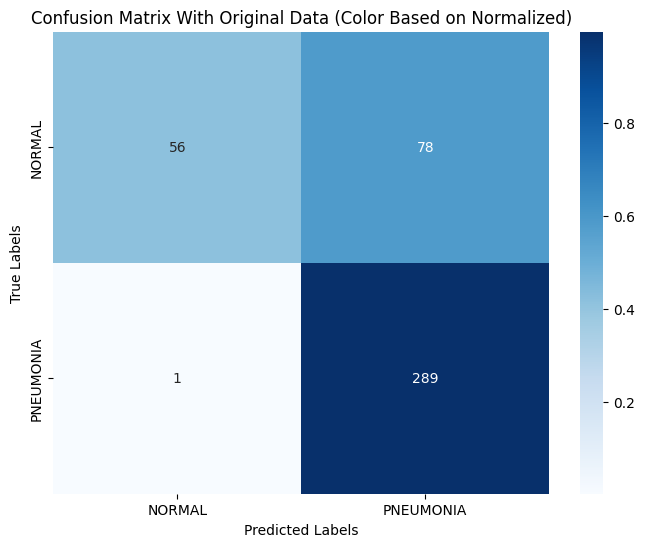

Classification Report With Augmented Data:
              precision    recall  f1-score   support

           0       0.98      0.42      0.59       134
           1       0.79      1.00      0.88       290

    accuracy                           0.81       424
   macro avg       0.88      0.71      0.73       424
weighted avg       0.85      0.81      0.79       424



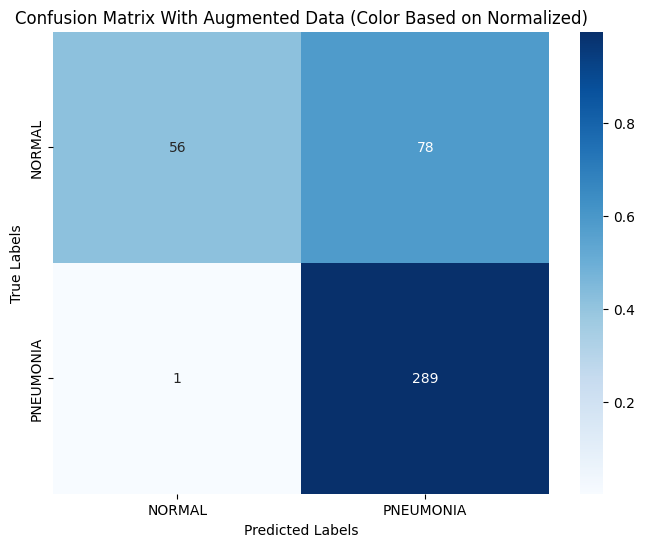

In [ ]:


print("Classification Report With Original Data:")
print(classification_report(test_Y, test_predictions))

cm_original = confusion_matrix(test_Y, test_predictions)

cm_original_normalized = cm_original.astype('float') / cm_original.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_original_normalized, annot=cm_original, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix With Original Data (Color Based on Normalized)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("Classification Report With Augmented Data:")
print(classification_report(test_Y, test_predictions_final))

cm_augmented = confusion_matrix(test_Y, test_predictions_final)

cm_augmented_normalized = cm_augmented.astype('float') / cm_augmented.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_augmented_normalized, annot=cm_augmented, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix With Augmented Data (Color Based on Normalized)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_Y, test_predictions)
recall = recall_score(test_Y, test_predictions)
f1 = f1_score(test_Y, test_predictions)

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")
print("Accuracy:", accuracy_score(test_Y, test_predictions))
print('\n')


precision_aug = precision_score(test_Y, test_predictions_final)
recall_aug = recall_score(test_Y, test_predictions_final)
f1_aug = f1_score(test_Y, test_predictions_final)

print(f"Precision Aug: {precision_aug}")
print(f"Recall Aug: {recall_aug}")
print(f"F1-score Aug: {f1_aug}")
print("Accuracy Aug:", accuracy_score(test_Y, test_predictions_final))

Precision : 0.7874659400544959
Recall : 0.996551724137931
F1-score : 0.8797564687975646
Accuracy: 0.8136792452830188


Precision Aug: 0.7874659400544959
Recall Aug: 0.996551724137931
F1-score Aug: 0.8797564687975646
Accuracy Aug: 0.8136792452830188
